# Mobility variable

Because the Safegraph panel is a growing quantity we need to normalize the counts. For a poi we normalize by dividing the unique visitor counts from each home cbg,$n_{c,t,visitors}$, by the number of unique devices whose home device is in that cbg, $n_{c,t,home}$ for that week. This gives an esimate of the number of individuals from that cbg who visited a poi. We then multiply this ratio by the estimated population of the cbg, $p_c$, obtained from the SafeGraph open census data.

Based on CDC guidelines we also note that the risk of transmission is higher when in close contact with people for more than 15 minutes. 

https://www.cdc.gov/coronavirus/2019-ncov/php/public-health-recommendations.html

We penalize for this by adding a factor consisting of a monotonic function $\phi$ evaluated on the median dwell time $t_{dwell}$. This gives us one generic mobility term shown below where $\mathcal{I}_{poi}$ is an index of pois and $\mathcal{C}_{i,t,cbg}$ is a subset of cbgs which had visitors to the poi, $i$, whose home device is in a cbg contained in $\mathcal{C}_{i,t,cbg}$.

$$
m_t = \sum_{i \in \mathcal{I}_{poi}} \sum_{c \in \mathcal{C}_{i,t,cbg}} \frac{n_{c,t,visitors}*p_c*\phi(t_{dwell})}{n_{c,t,home}}
$$

This generic mobility term can then be extended to account for the surface area of the poi which factors in the potential proximity of individuals visiting a poi.

$$
m_t = \sum_{i \in \mathcal{I}_{poi}} \sum_{c \in \mathcal{C}_{i,t,cbg}} \frac{n_{c,t,visitors}*p_c*\phi(t_{dwell})}{A_{i}*n_{c,t,home}}
$$

For our purposes we let $\phi(t) = \sigma(t-15)$ where $\sigma$ is the sigmoid function. This effectively sets the multiplicate factor to $0$ when $t<<15$ and to $1$ when $t>=17$

In [32]:
COLUMNS = [
    'Bakeries and Tortilla Manufacturing',
    'Beer, Wine, and Liquor Stores',
    'Beverage Manufacturing',
    'Book Stores and News Dealers',
    'Child Day Care Services',
    'Clothing Stores',
    'Colleges, Universities, and Professional Schools',
    'Continuing Care Retirement Communities and Assisted Living Facilities for the Elderly',
    'Couriers and Express Delivery Services',
    'Department Stores',
    'Drinking Places (Alcoholic Beverages)',
    'Electric Power Generation, Transmission and Distribution',
    'Electronic and Precision Equipment Repair and Maintenance',
    'Electronics and Appliance Stores',
    'Elementary and Secondary Schools',
    'Florists',
    'General Merchandise Stores, including Warehouse Clubs and Supercenters',
    'Grocery Stores',
    'Home Health Care Services',
    'Junior Colleges',
    'Motion Picture and Video Industries',
    'Nursing Care Facilities (Skilled Nursing Facilities)',
    'Offices of Dentists',
    'Offices of Other Health Practitioners',
    'Offices of Physicians',
    'Offices of Real Estate Agents and Brokers',
    'Office Supplies, Stationery, and Gift Stores',
    'Other Amusement and Recreation Industries',
    'Other Schools and Instruction',
    'Postal Service',
    'Religious Organizations',
    'Special Food Services',
    'Specialized Freight Trucking',
    'Specialty (except Psychiatric and Substance Abuse) Hospitals',
    'Specialty Food Stores',
    'Spectator Sports',
    'Warehousing and Storage',
]

# Spearman correlation plots

In [35]:
visitor_corr = visitor_df.corr('spearman')
density_corr = density_df.corr('spearman')

<AxesSubplot:>

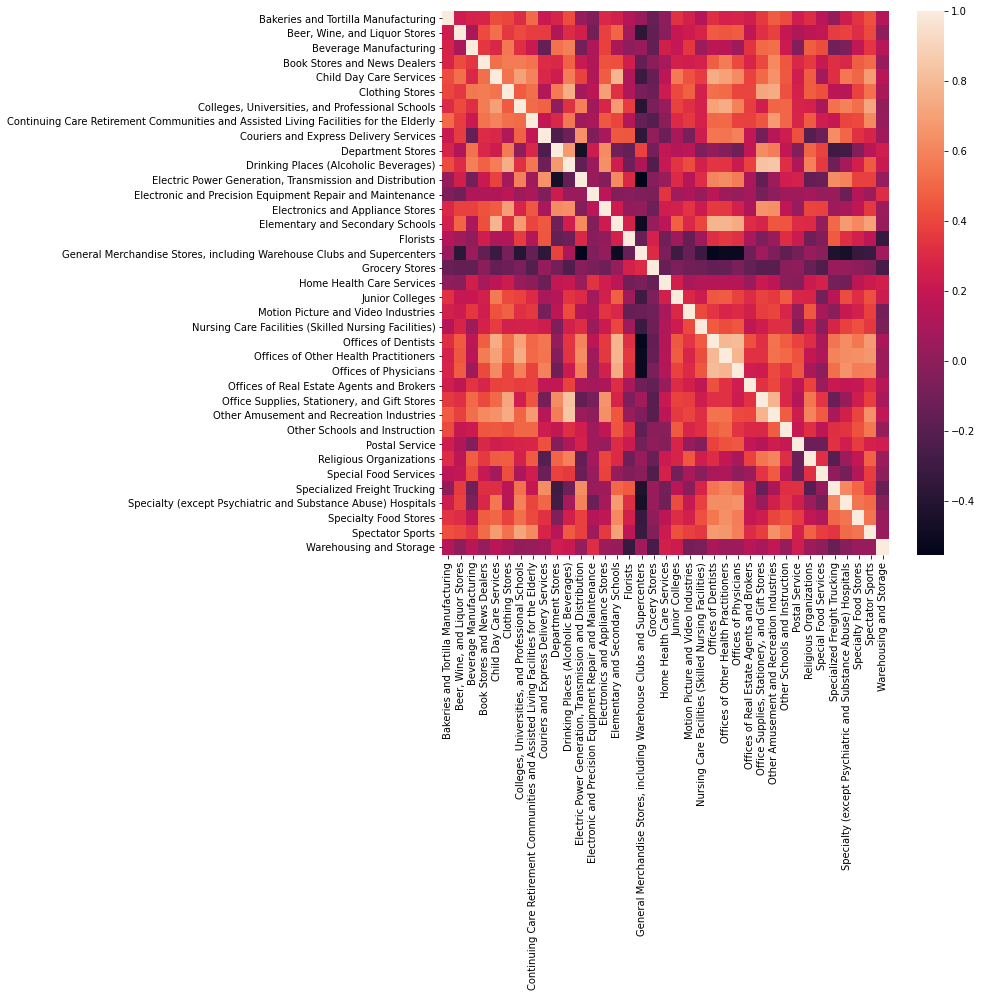

In [38]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(visitor_corr, xticklabels=True, yticklabels=True,ax=ax)

<AxesSubplot:ylabel='pair'>

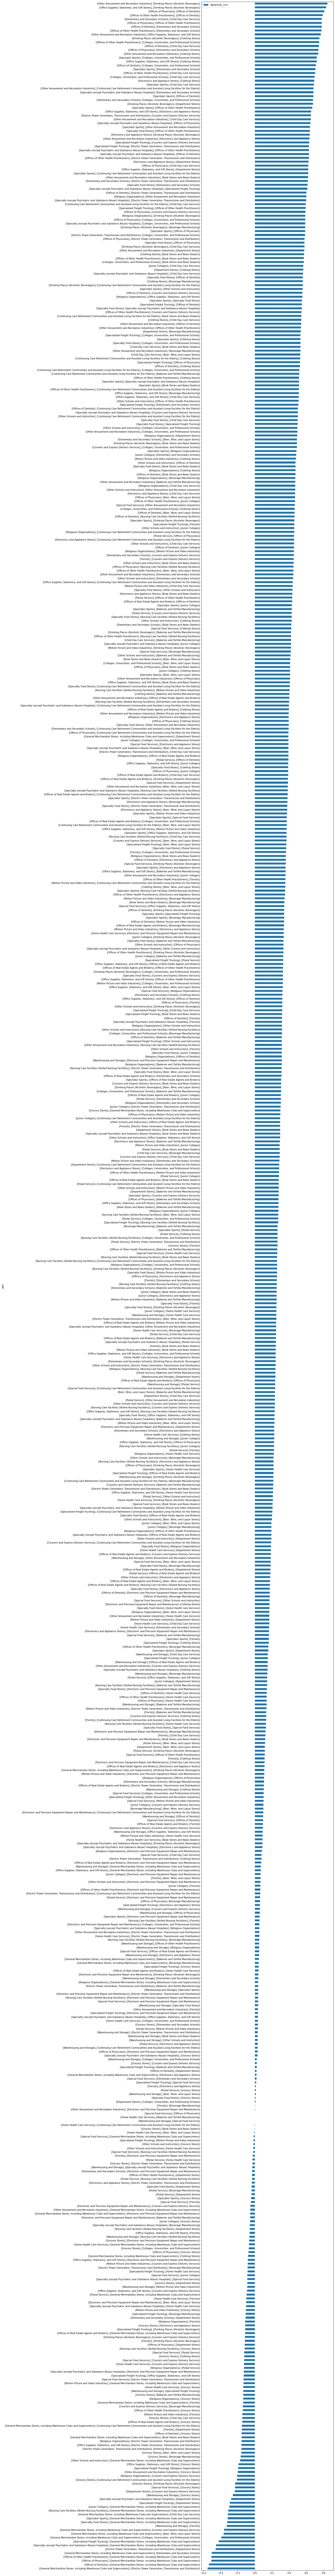

In [96]:
category1 = []
category2 = []

visitor_rank = []
visitor_rank_df = pd.DataFrame()
for i in range(len(visitor_corr)):
    for j in range(i):
        col1 = visitor_corr.columns[i]
        col2 = visitor_corr.columns[j]
        
        category1.append(col1)
        category2.append(col2)        
        rank = visitor_corr[col1][col2]
        visitor_rank.append(rank)
        
visitor_rank_df['category1'] = category1
visitor_rank_df['category2'] = category2
visitor_rank_df['pair'] = '[' + visitor_rank_df['category1'] + '], [' + visitor_rank_df['category2'] + ']'
visitor_rank_df['spearman_corr'] = visitor_rank

visitor_rank_df.sort_values(by='spearman_corr', inplace=True, ascending=True)

visitor_rank_df.plot.barh(x='pair', y='spearman_corr', figsize=(10,200))

<AxesSubplot:>

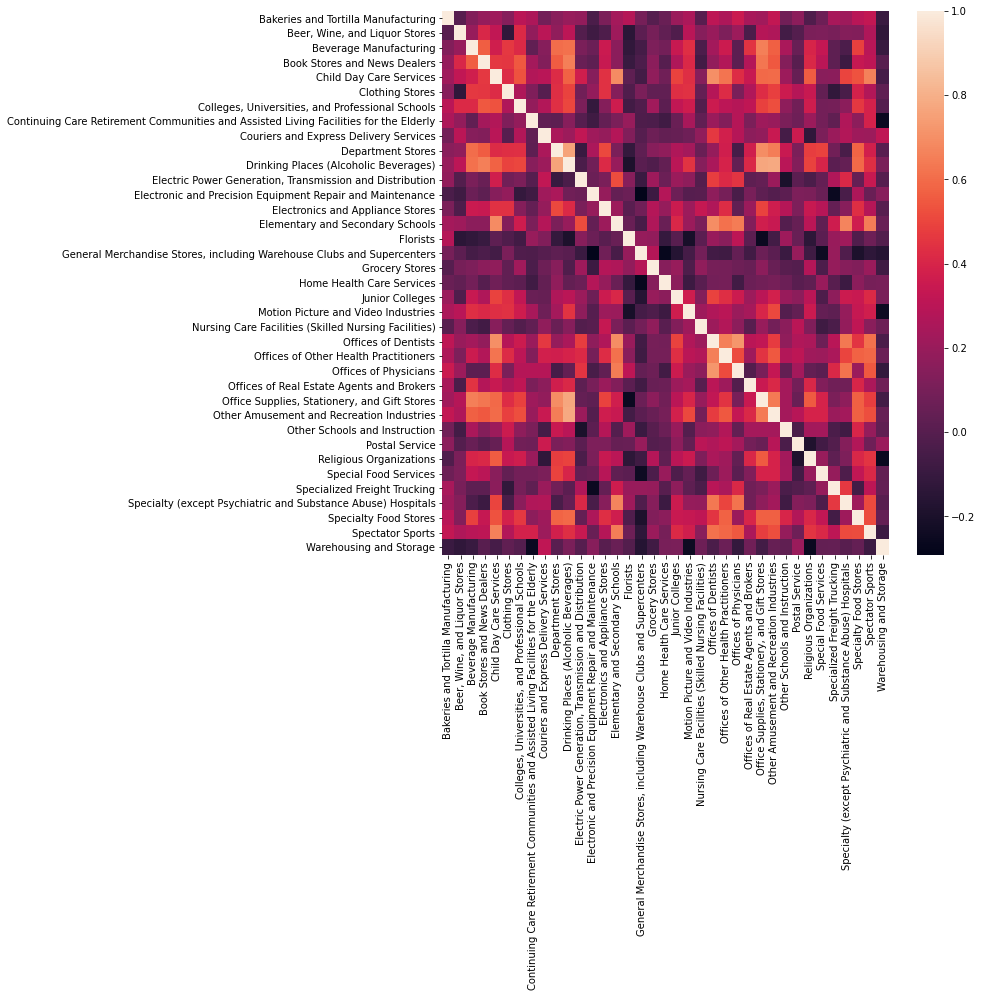

In [37]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(density_corr, xticklabels=True, yticklabels=True,ax=ax)

<AxesSubplot:ylabel='pair'>

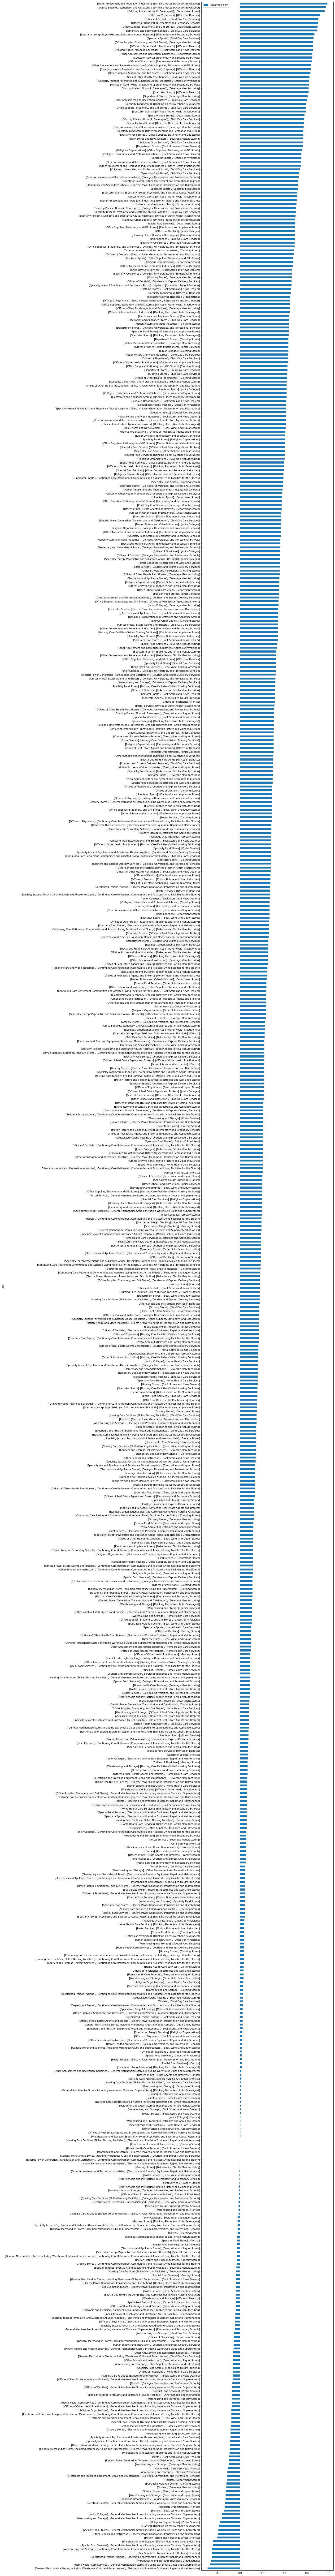

In [98]:
category1 = []
category2 = []

density_rank = []
density_rank_df = pd.DataFrame()
for i in range(len(density_corr)):
    for j in range(i):
        col1 = density_corr.columns[i]
        col2 = density_corr.columns[j]
        
        category1.append(col1)
        category2.append(col2)        
        rank = density_corr[col1][col2]
        density_rank.append(rank)
        
density_rank_df['category1'] = category1
density_rank_df['category2'] = category2
density_rank_df['pair'] = '[' + density_rank_df['category1'] + '], [' + density_rank_df['category2'] + ']'
density_rank_df['spearman_corr'] = density_rank

density_rank_df.sort_values(by='spearman_corr', inplace=True, ascending=True)

density_rank_df.plot.barh(x='pair', y='spearman_corr', figsize=(10,200))

# Mobility plots

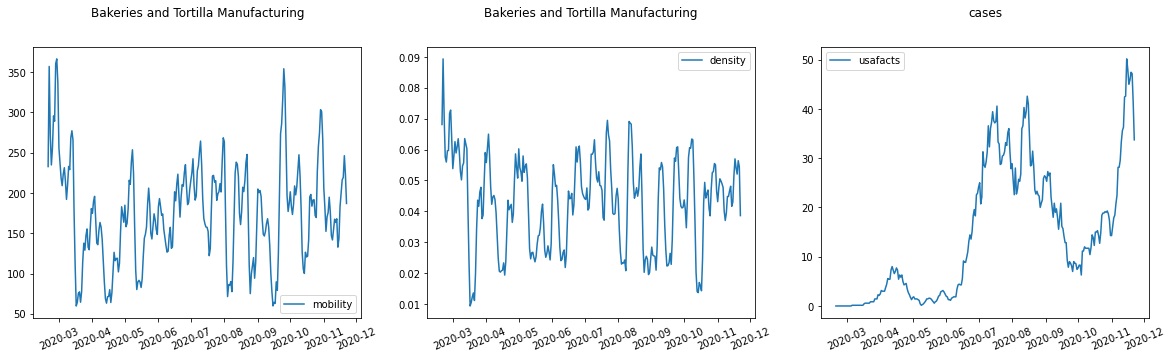

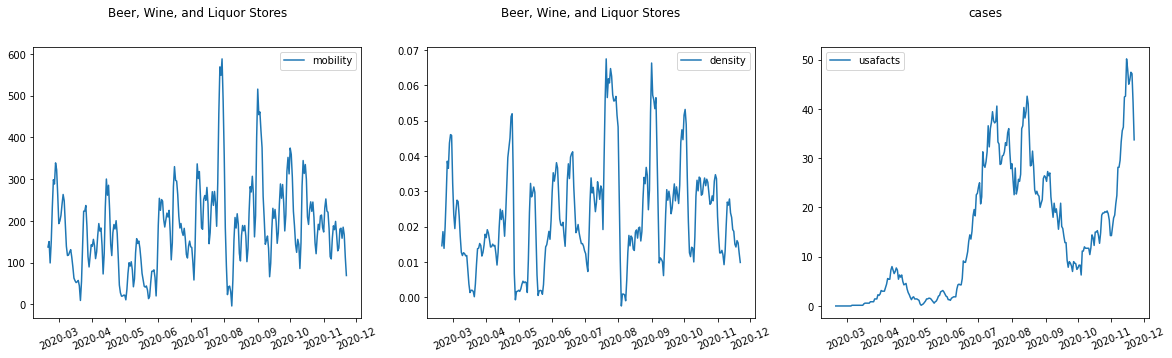

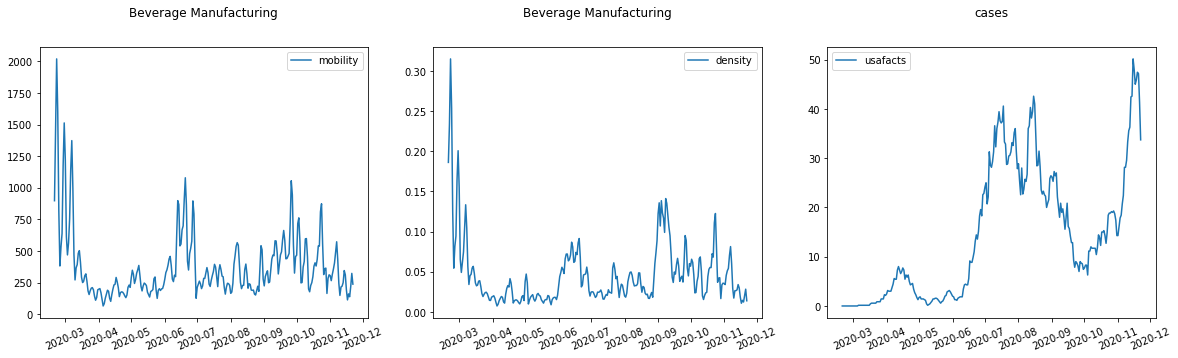

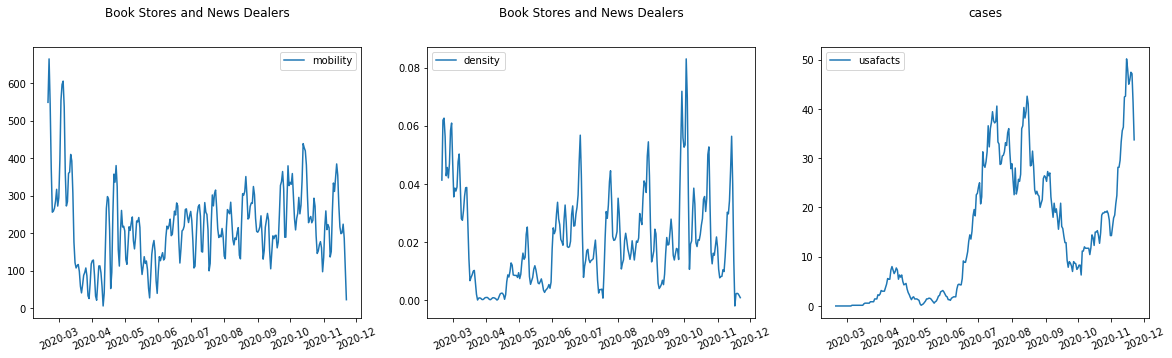

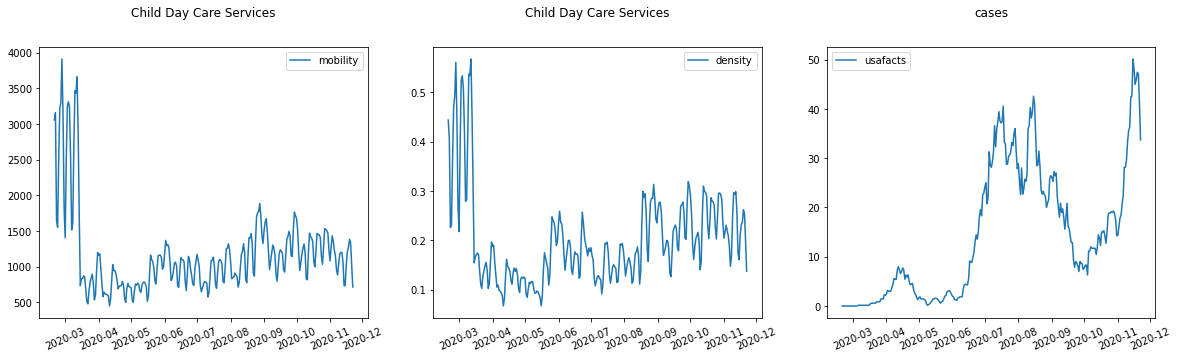

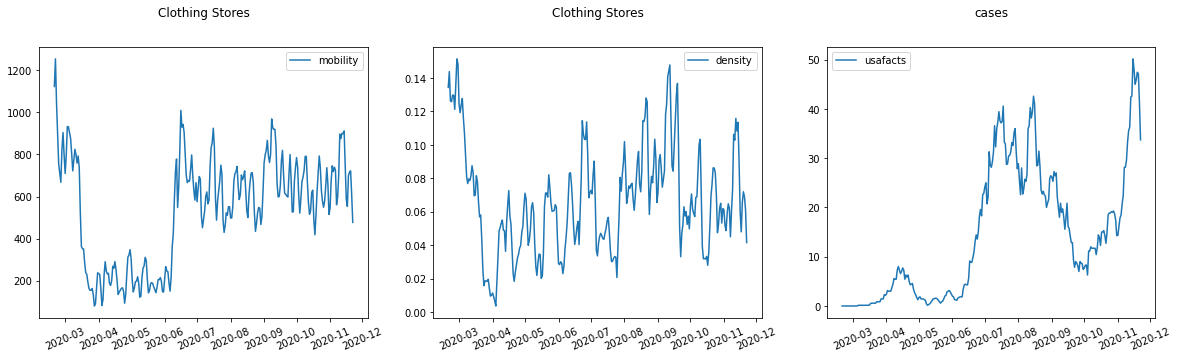

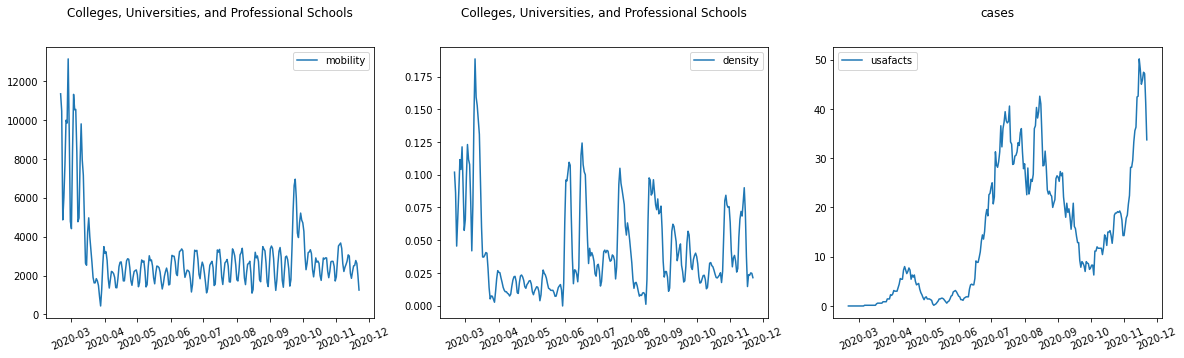

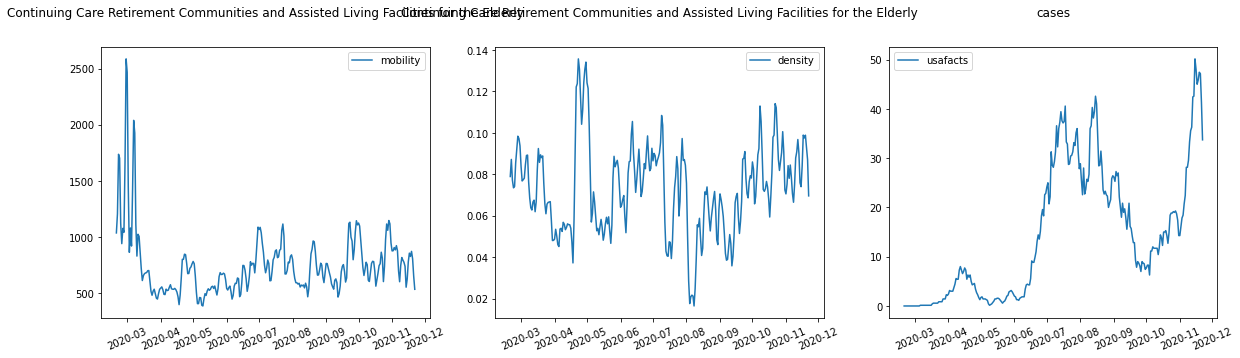

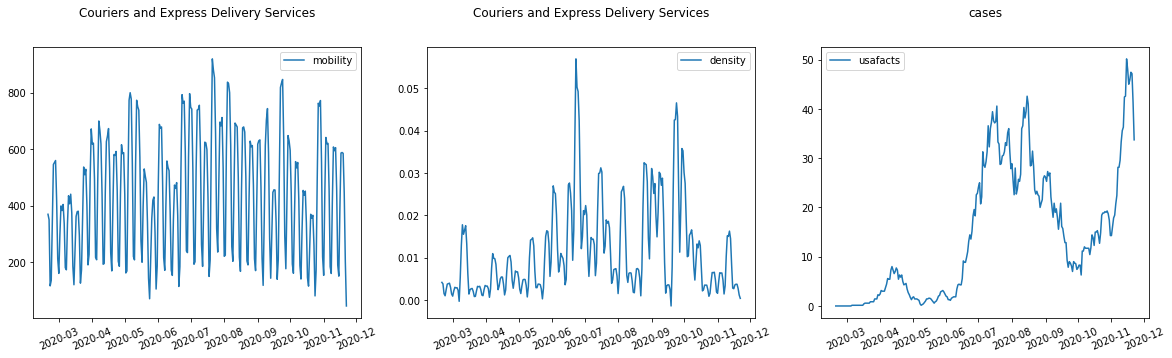

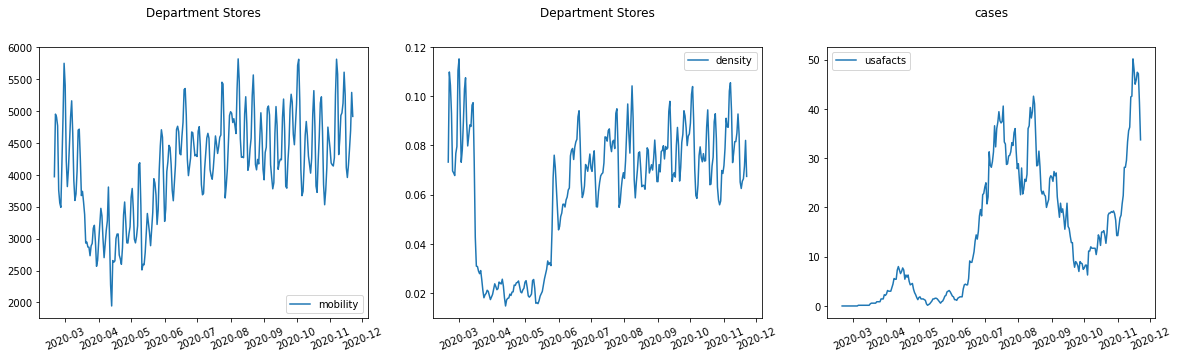

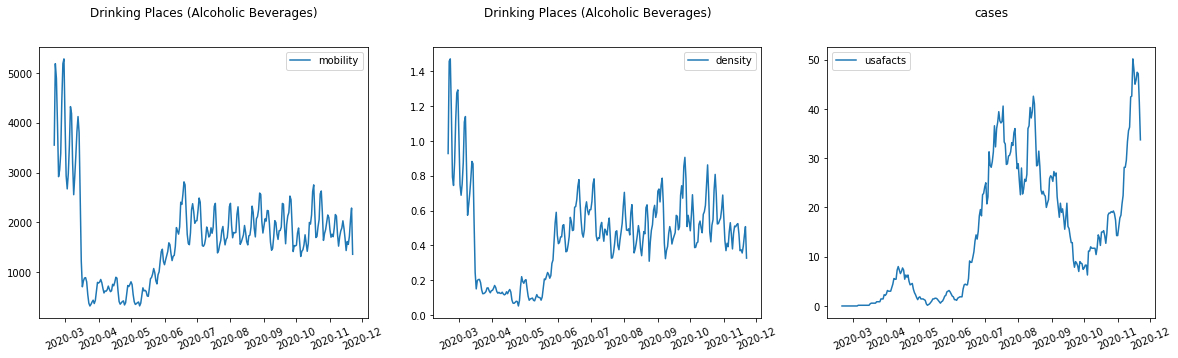

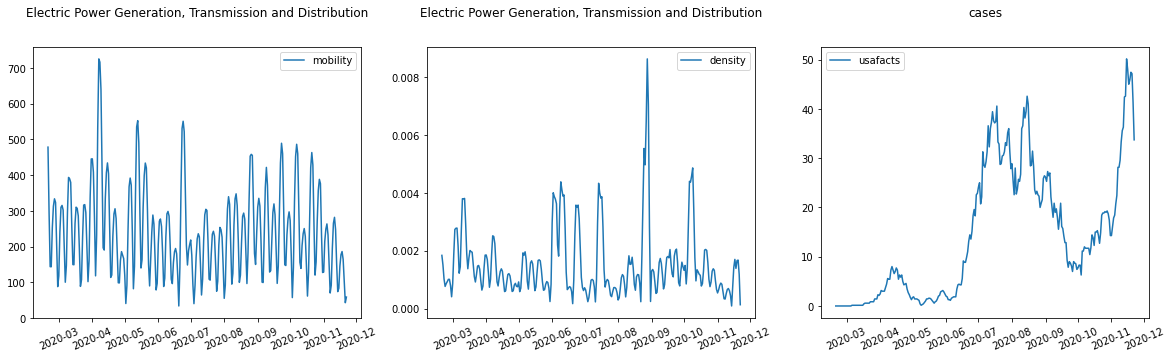

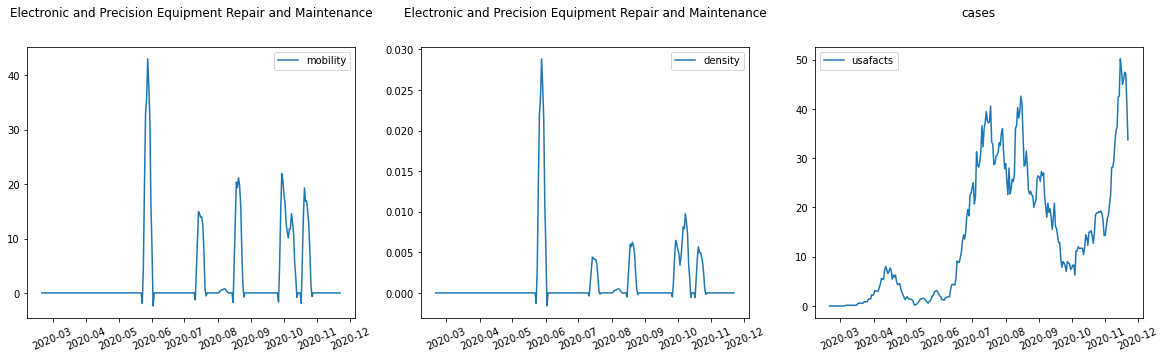

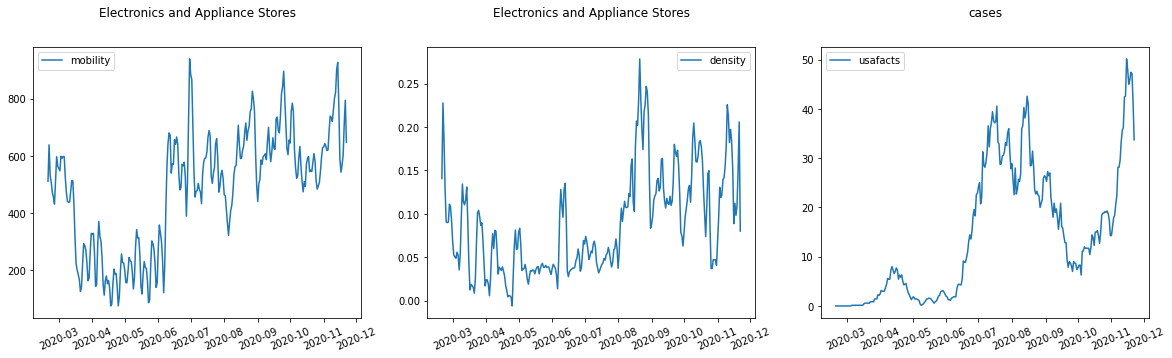

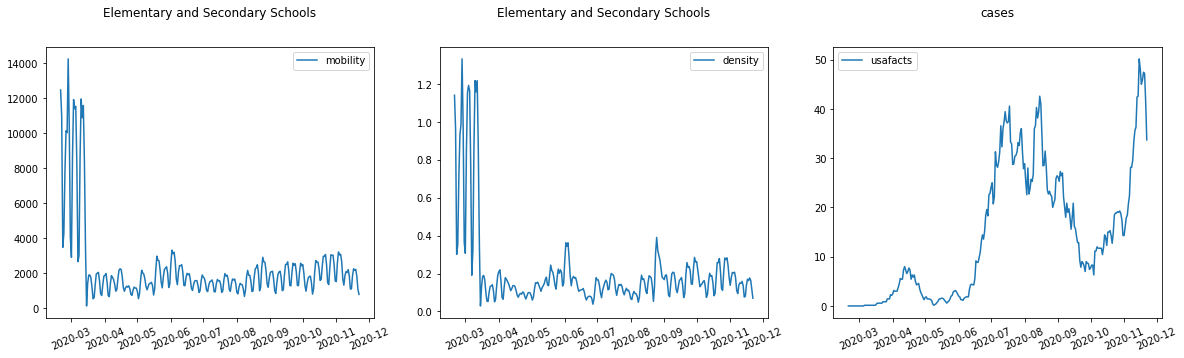

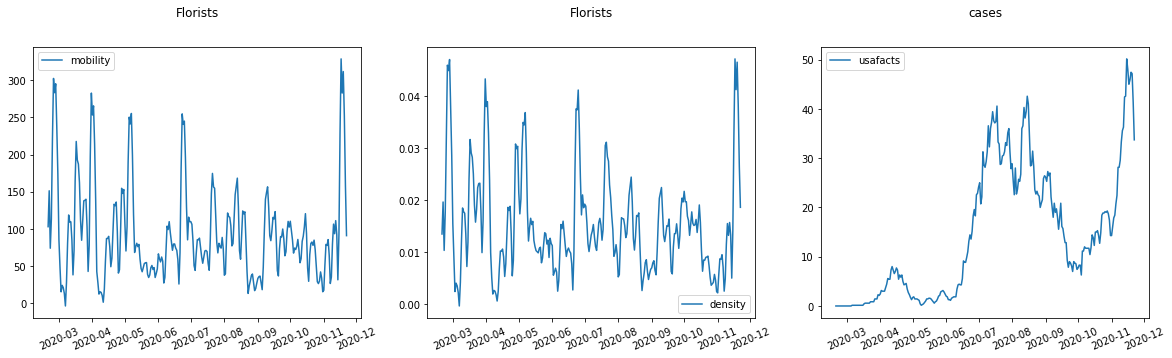

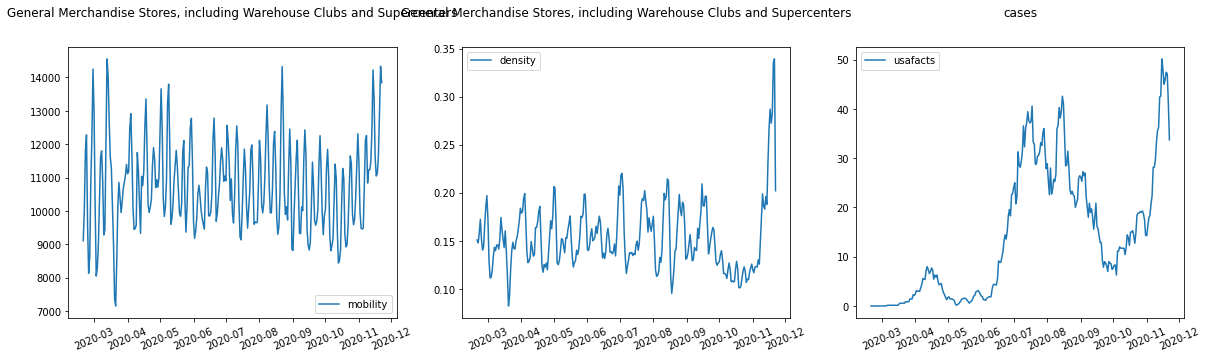

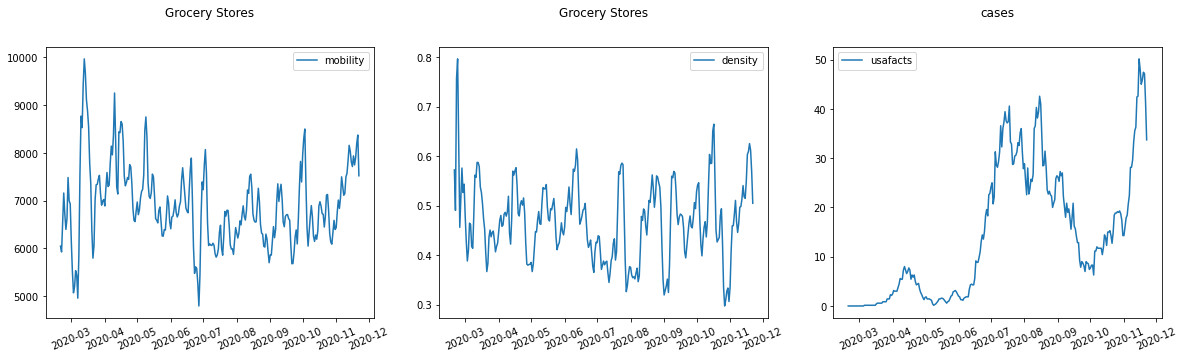

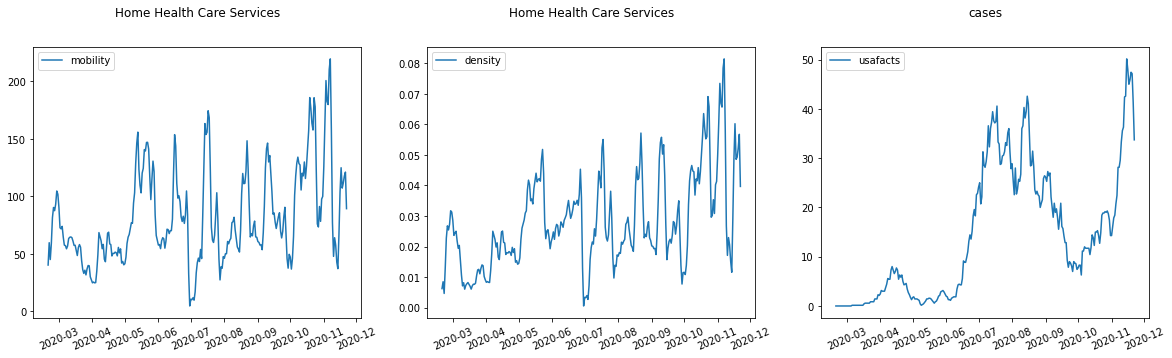

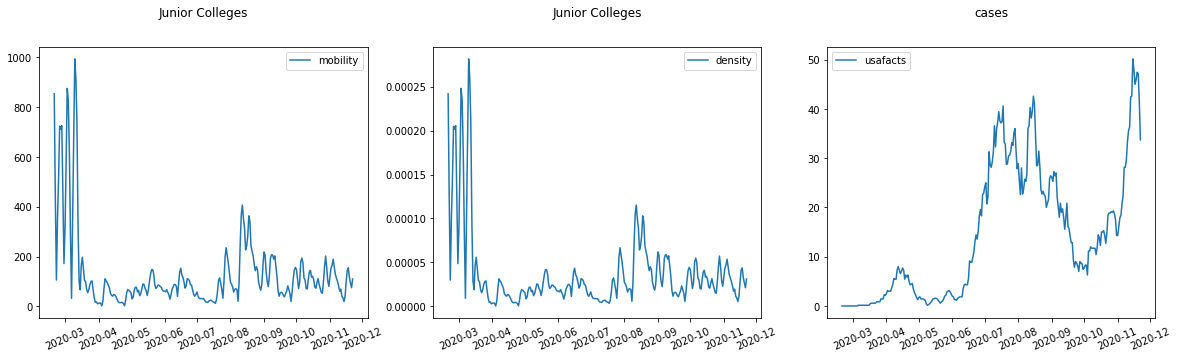

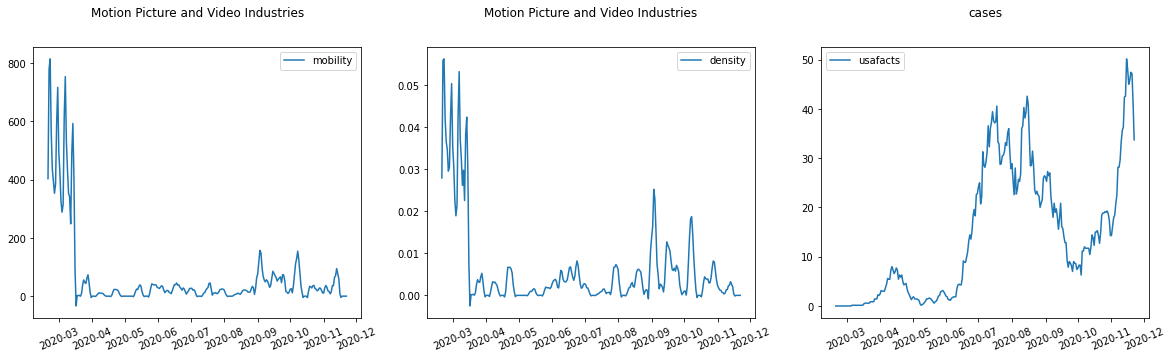

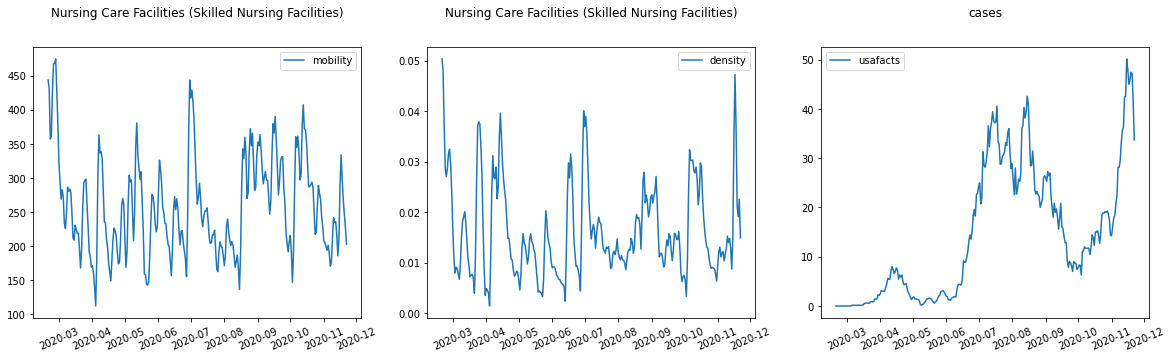

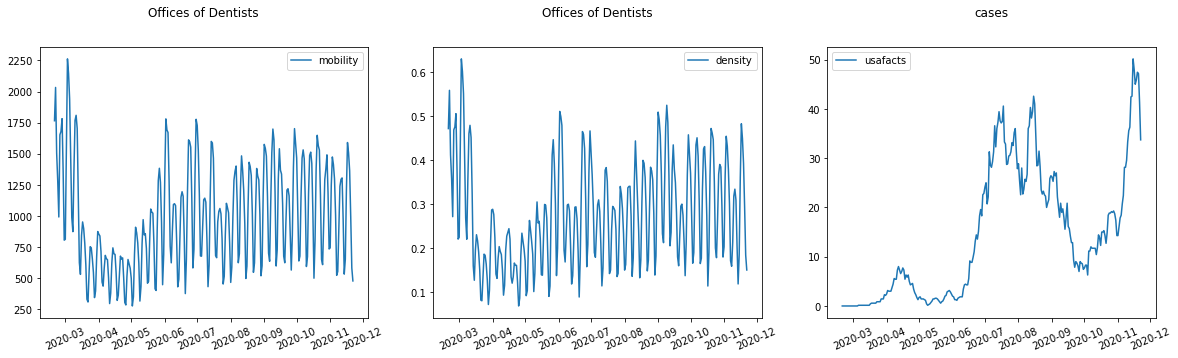

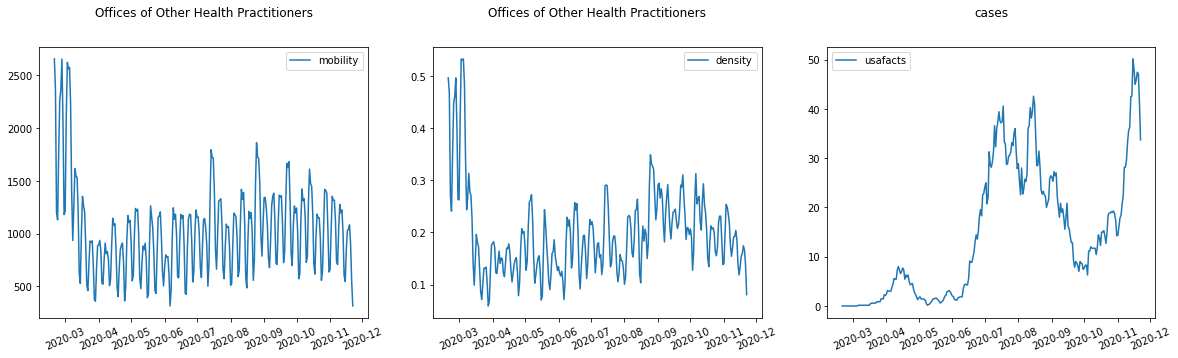

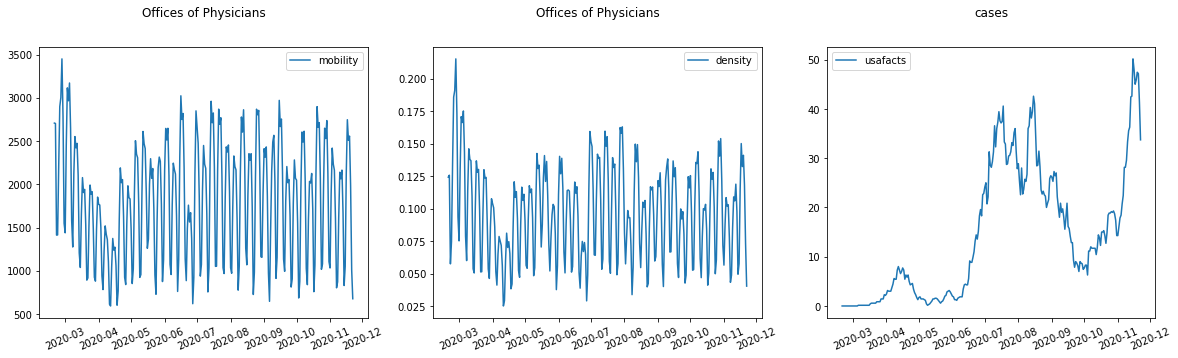

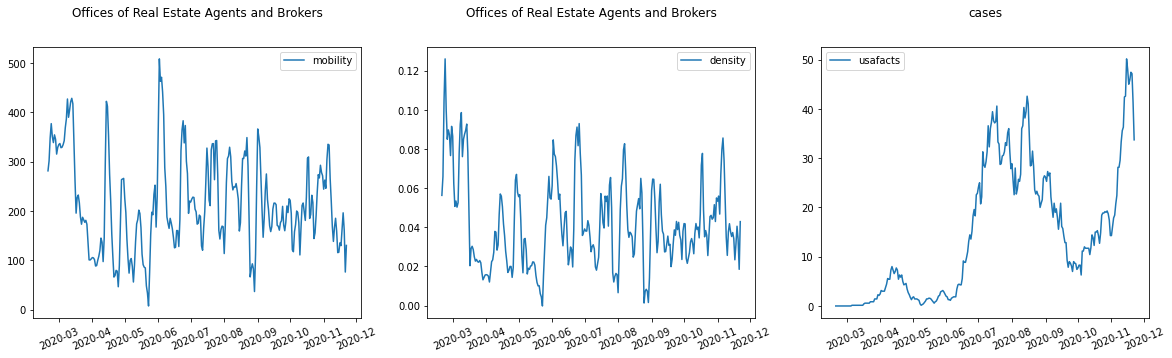

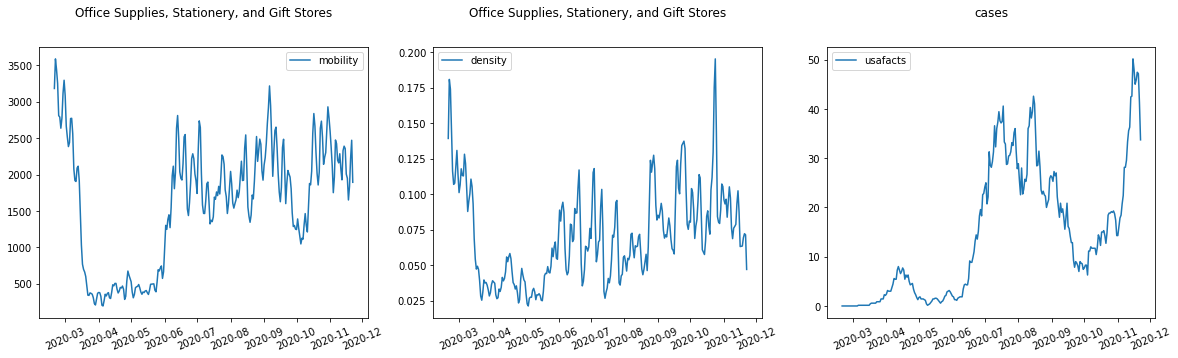

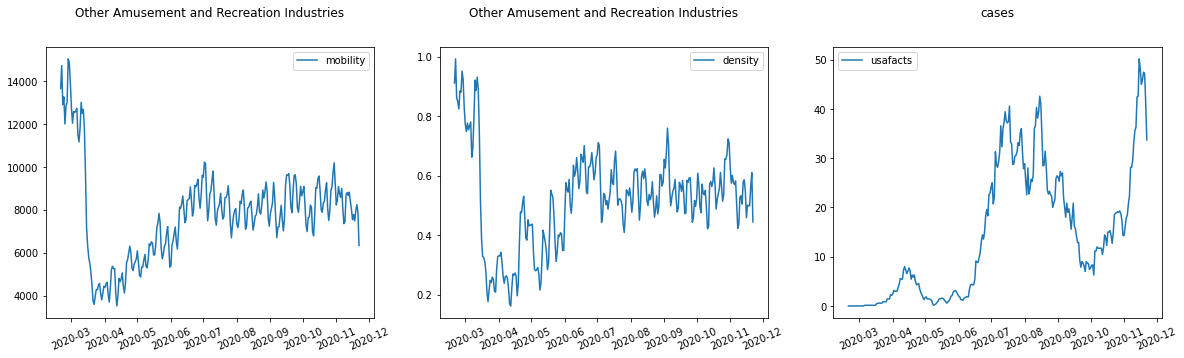

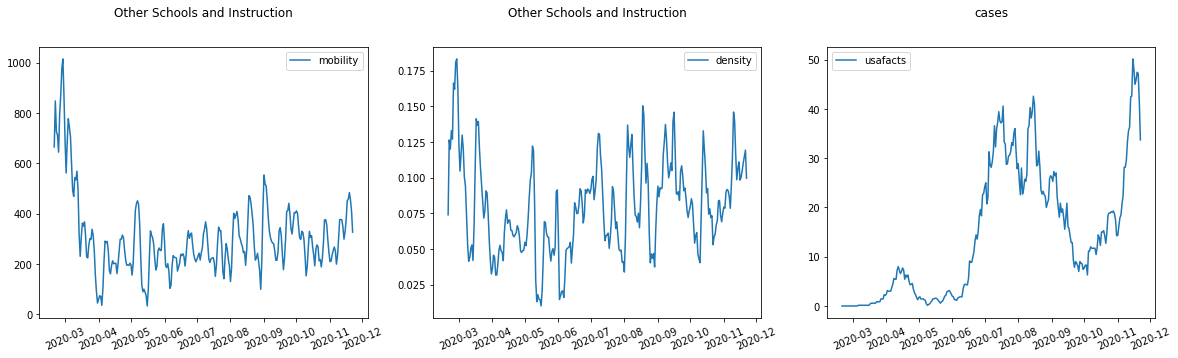

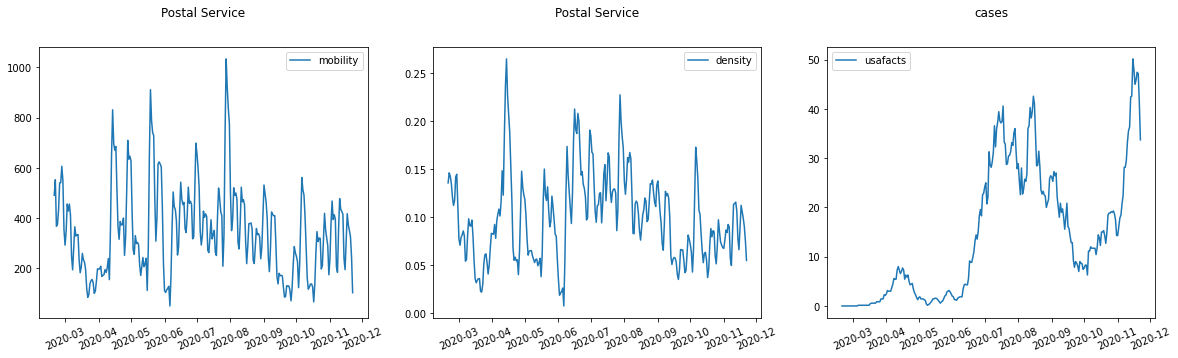

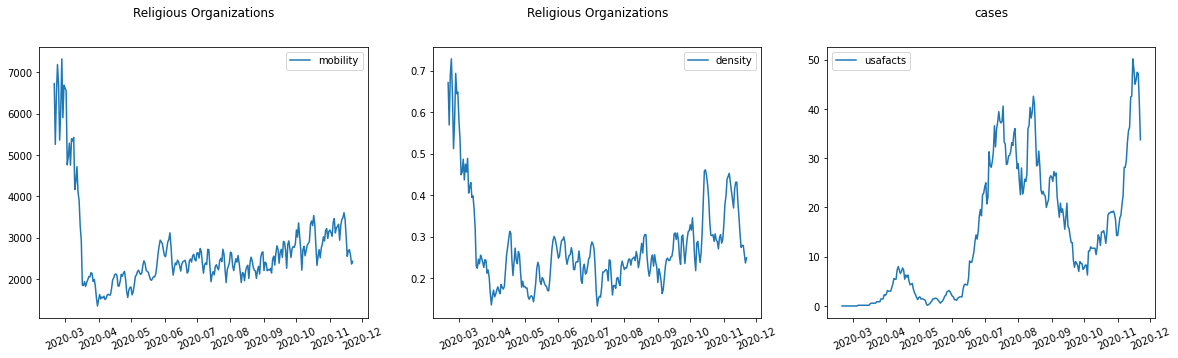

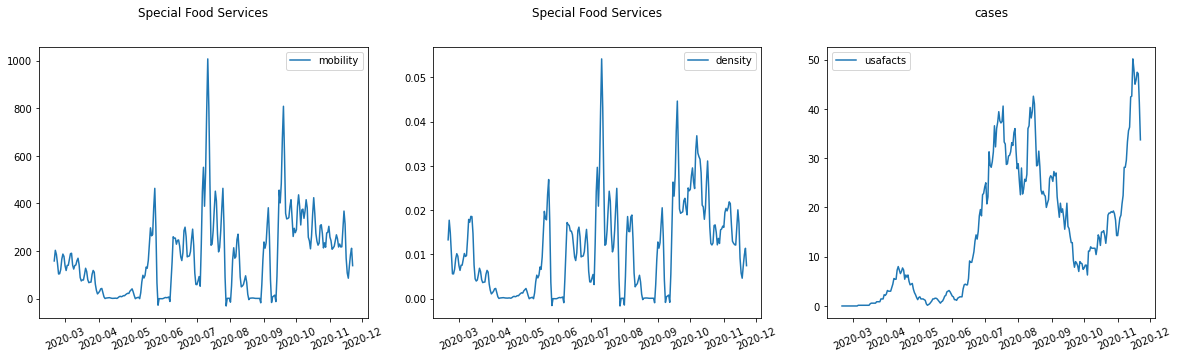

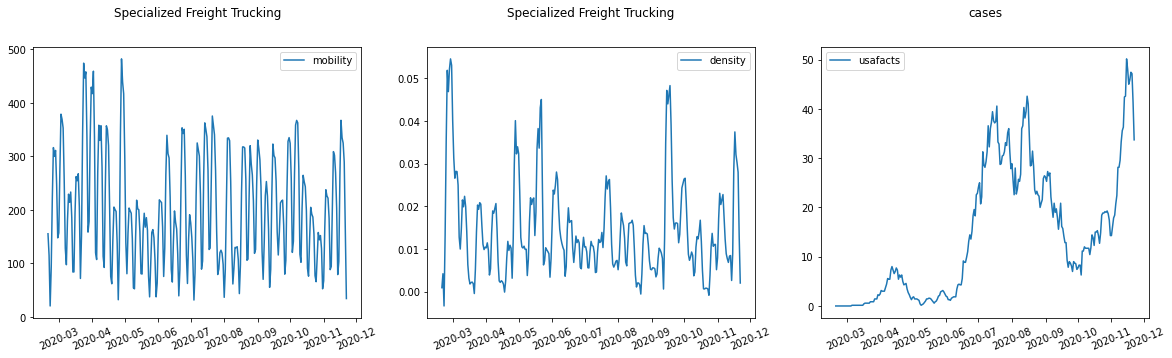

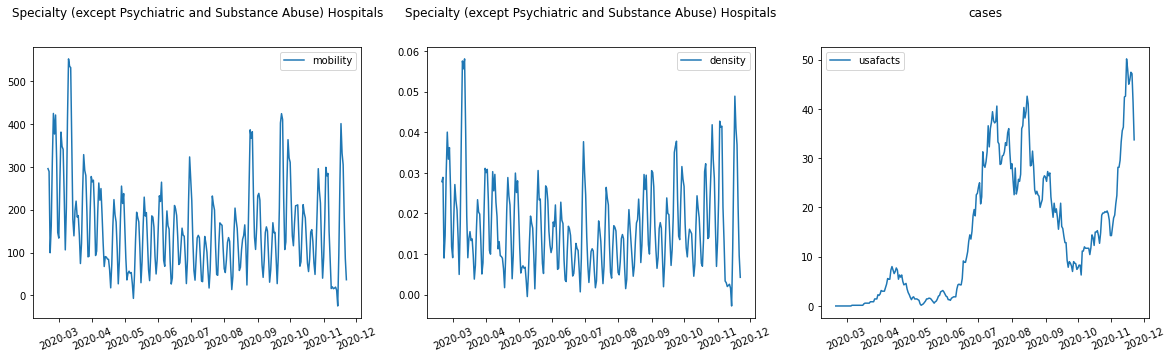

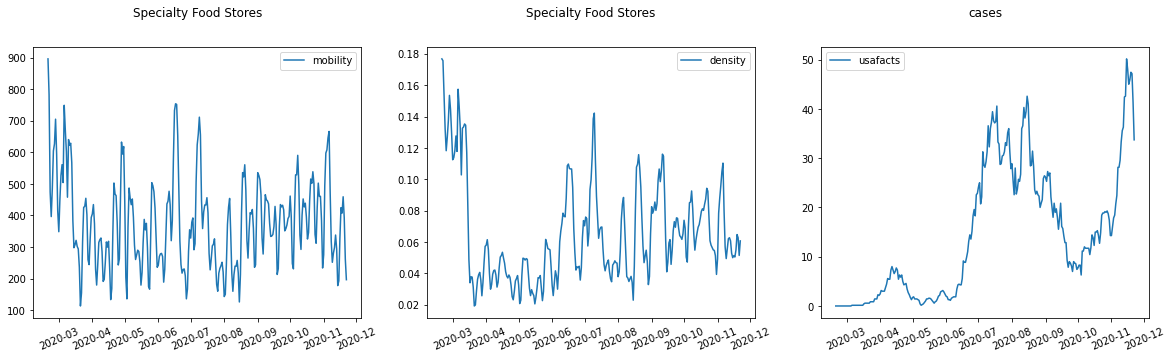

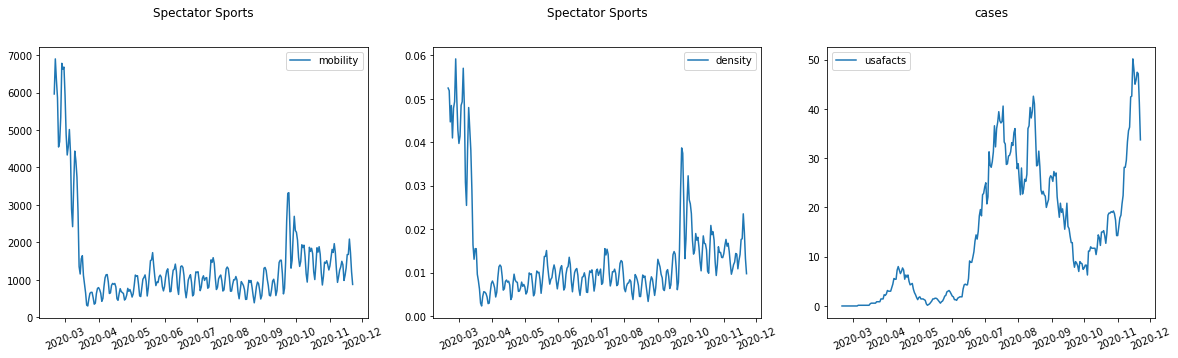

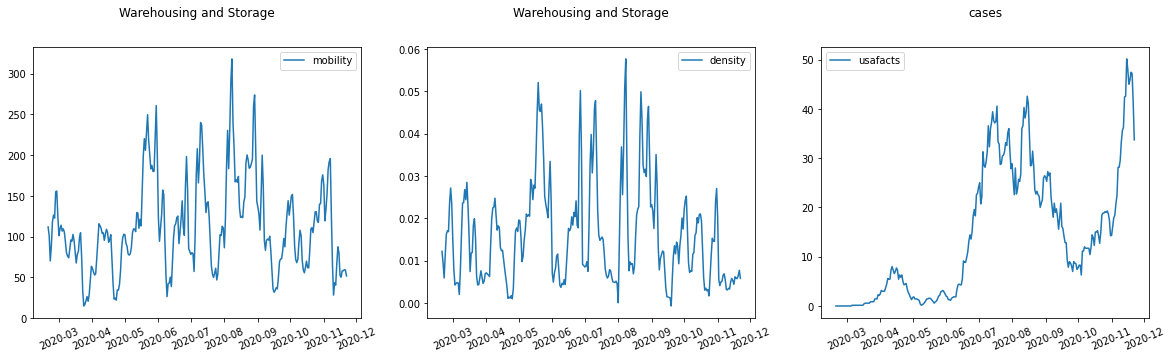

In [59]:
for top_category in COLUMNS:
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

    i=0
    ax[i].plot(dates,scipy.signal.savgol_filter(df[top_category][0]['sum'].to_numpy(), 5, 3), label='mobility')
    ax[i].set_title(top_category[:100],pad=30)
    ax[i].tick_params(axis='x',labelrotation=23)
    ax[i].legend()
    
    i=1
    ax[i].plot(dates,scipy.signal.savgol_filter(df[top_category][1]['mean'].to_numpy(), 5, 3), label='density')
    ax[i].set_title(top_category[:100],pad=30)
    ax[i].tick_params(axis='x',labelrotation=23)
    ax[i].legend()
    
    i=2
    ax[i].plot(dates,cases, label='usafacts')
    ax[i].set_title('cases',pad=30)
    ax[i].tick_params(axis='x',labelrotation=23)
    ax[i].legend()